Dr Oliviero Andreussi, olivieroandreuss@boisestate.edu

Boise State University, Department of Chemistry and Biochemistry

# Fitting and Data Analysis for the UV-Vis Particle in a Box Experiment {-}

Before we start, let us import the main modules that we will need for this lecture. You may see some new modules in the list below, we will add more details in the right sections.

In [4]:
# Import the main modules used in this worksheet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

We need to load the Google Drive and access a file that contains the information on the molecules studies and the measured absorption wavelengths. You can use the same set that I am using by downloading it from Canvas, [here](https://boisestatecanvas.instructure.com/courses/20544/files/10392339?wrap=1). Or you can use your own files. I am assuming the file in question will be located in a `ParticleBox_Data/` subfolder in your `Colab Notebook/` folder. I will be using a file named `particleinabox.csv`, make sure to change this name if you use a different file. Also, in the file you will need to change the absorption wavelengths into your own measured results, as they are all set to 500 nm in the template file.

In [ ]:
# Load the google drive with your files 
from google.colab import drive
drive.mount('/content/drive')
# The following needs to be the path of the folder with all your datafile in .csv format
path='/content/drive/MyDrive/Colab Notebooks/ParticleBox_Data/'
file='particleinabox.csv'

The following module needs to be installed on Colab. We won't need it too much for this analysis, but they offer a lot of nice features for chemistry programming. 

In [ ]:
# These modules are needed to draw chemical formulas
#!pip install rdkit cirpy
from rdkit import Chem
from rdkit.Chem import Draw
import cirpy

In particular we can use them to draw the molecules in our experiments

In [ ]:
data=pd.read_csv(path+file)
data

If we want to visualize the different molecules used in the experiment, we can convert the CAS codes into smiles and use them to generate the chemical structures

In [ ]:
data['smiles']=[ cirpy.resolve( x['cas'],'smiles') for i,x in data.iterrows() ]
# unfortunately one of the molecules is not in the databases and we need to enter the smiles by hand
data.loc[5,'smiles']='[I-].CCN1C=CC(=CC=CC=CC2=CC=[N+](C3=CC=CC=C23)CC)C4=CC=CC=C41'
data

We can now visualize the molecule that we like

In [ ]:
index=0
display(Draw.MolToImage( Chem.MolFromSmiles(data.loc[index,'smiles']), size=(300, 300) ))

In [ ]:
def lambda_FE(p,alpha=0.):
    """
    Function to compute the absorption wavelenght (in nm)
    as a function of the number of carbon atoms in the conjugated chain
    and an optional parameter alpha that accounts for some wiggle room
    due to the aromatic rings
    """
    return 63.7*(p+3+alpha)**2/(p+4)

Given the function above, we can compute a new column of the dataframe with the predicted lambdas in one command

In [ ]:
data['lambda_FE']=lambda_FE(data['p'])
data

We can visualize the results as usual

In [ ]:
plt.scatter(data['p'],data['lambda'])
plt.plot(data['p'],data['lambda_FE'],color='red')
plt.show()

Given our experimental and predicted values of lambda, we can compute the sum of squares as follows:

In [ ]:
TSS=np.sum((data['lambda']-data['lambda'].mean())**2)
print("The total sum of squares is {:10.4f} ".format(TSS))

In [ ]:
RSS=np.sum((data['lambda']-data['lambda_FE'])**2)
print("The residual sum of squares is {:10.4f} ".format(RSS))

In [ ]:
R2=1-(RSS/TSS)
print("The coefficient of determination R2 for the particle in a box model is {:5.4f} ".format(R2))

## Huckel Model for Conjugated Molecules {-}

In [11]:
n_conjugated = 4
alpha = -2.
beta = -1.
topology = np.zeros((n_conjugated,n_conjugated))
diagonal = np.ones(n_conjugated)*alpha
offdiagonal = np.ones(n_conjugated-1)*beta
topology = topology + np.diag(diagonal,0) + np.diag(offdiagonal,1) + np.diag(offdiagonal,-1)
print(topology)

[[-2. -1.  0.  0.]
 [-1. -2. -1.  0.]
 [ 0. -1. -2. -1.]
 [ 0.  0. -1. -2.]]


In [12]:
np.linalg.eig(topology)

(array([-3.61803399, -2.61803399, -0.38196601, -1.38196601]),
 array([[ 0.37174803, -0.60150096, -0.37174803,  0.60150096],
        [ 0.60150096, -0.37174803,  0.60150096, -0.37174803],
        [ 0.60150096,  0.37174803, -0.60150096, -0.37174803],
        [ 0.37174803,  0.60150096,  0.37174803,  0.60150096]]))

In [15]:
n_conjugated = 6
alpha = -2.
beta = -1.
topology = np.zeros((n_conjugated,n_conjugated))
diagonal = np.ones(n_conjugated)*alpha
offdiagonal = np.ones(n_conjugated-1)*beta
topology[0,n_conjugated-1]=beta
topology[n_conjugated-1,0]=beta
topology = topology + np.diag(diagonal,0) + np.diag(offdiagonal,1) + np.diag(offdiagonal,-1)
print(topology)

[[-2. -1.  0.  0.  0. -1.]
 [-1. -2. -1.  0.  0.  0.]
 [ 0. -1. -2. -1.  0.  0.]
 [ 0.  0. -1. -2. -1.  0.]
 [ 0.  0.  0. -1. -2. -1.]
 [-1.  0.  0.  0. -1. -2.]]


In [29]:
eigenvalues,eigenvectors=np.linalg.eig(topology)
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

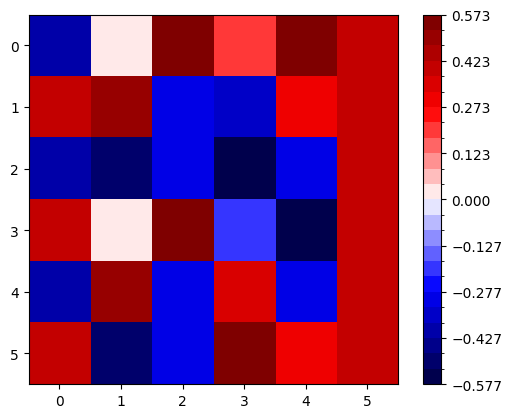

In [30]:
from matplotlib.colors import BoundaryNorm
bounds = np.arange(np.min(eigenvectors),np.max(eigenvectors),.05)
cmap = plt.get_cmap('seismic')
idx=np.searchsorted(bounds,0)
bounds=np.insert(bounds,idx,0)
norm = BoundaryNorm(bounds, cmap.N)
plt.imshow(eigenvectors,interpolation='none',norm=norm,cmap=cmap)
plt.colorbar()
plt.show()
